# Data cleaning and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:/A GETAJOBDUDE/PROJECTS/archive/CreditCardTransaction.csv",
    dtype={'TranxDate': str})


df.info()          
df.describe()     
df.shape          
df.columns         
df.index           
df.dtypes     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788521 entries, 0 to 788520
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              788521 non-null  int64  
 1   Month             788521 non-null  int64  
 2   Department        788521 non-null  object 
 3   Division          788521 non-null  object 
 4   Merchant          788521 non-null  object 
 5   TranxDescription  788521 non-null  object 
 6   TranxDate         788521 non-null  object 
 7   TrnxAmount        788521 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 48.1+ MB


Year                  int64
Month                 int64
Department           object
Division             object
Merchant             object
TranxDescription     object
TranxDate            object
TrnxAmount          float64
dtype: object

In [2]:
print(df['TranxDate'].head(10))

# clear the blank and formatting
df['TranxDate'] = df['TranxDate'].str.strip().str.replace('/', '-', regex=False)

# format to date
df['TranxDate'] = pd.to_datetime(df['TranxDate'], format='mixed', errors='coerce')

print(df['TranxDate'].head(10))
print("N/A:", df['TranxDate'].isna().sum())



0    06/29/2018
1    07-03-2018
2    07-01-2018
3    06/30/2018
4    06/27/2018
5    06/27/2018
6    06/27/2018
7    07-04-2018
8    06/27/2018
9    06/27/2018
Name: TranxDate, dtype: object
0   2018-06-29
1   2018-07-03
2   2018-07-01
3   2018-06-30
4   2018-06-27
5   2018-06-27
6   2018-06-27
7   2018-07-04
8   2018-06-27
9   2018-06-27
Name: TranxDate, dtype: datetime64[ns]
N/A: 0


## Univariate Analysis


## Distribution of Transaction Amount, boxplot


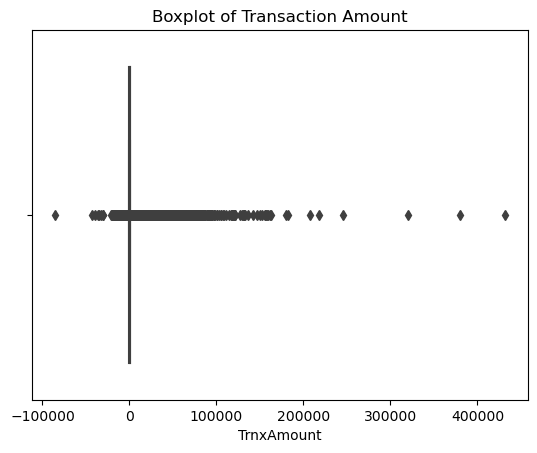

In [3]:
sns.boxplot(x=df['TrnxAmount'])
plt.title("Boxplot of Transaction Amount")
plt.show()

D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


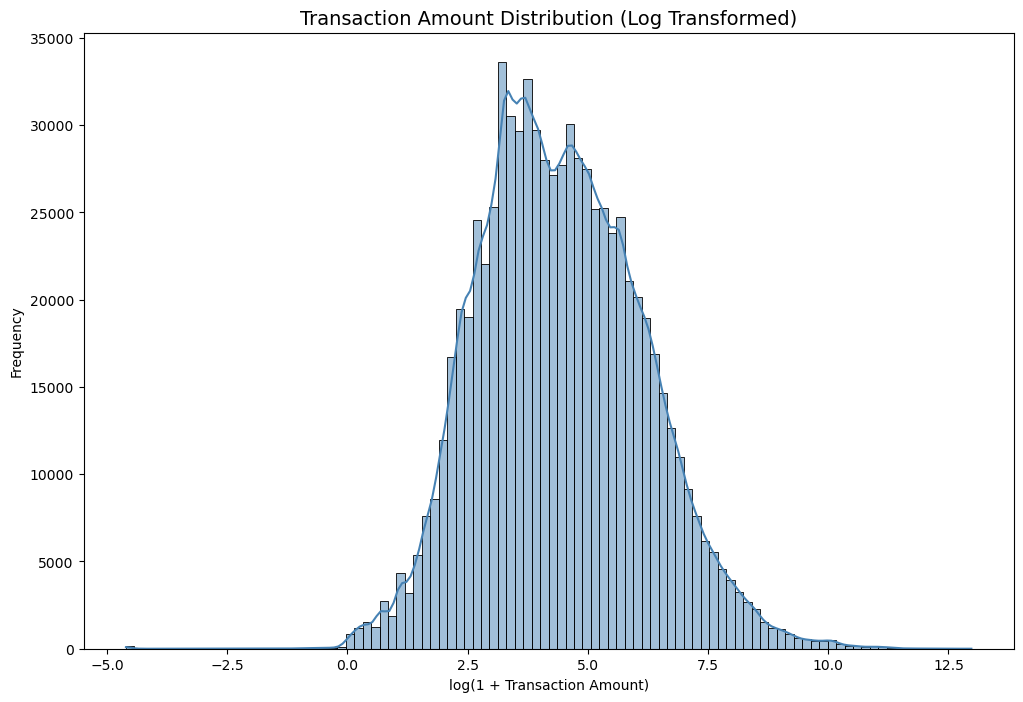

In [4]:
#Distribution is Right-Skewed
#Use log transformation

df['LogAmount'] = np.log1p(df['TrnxAmount'])  # log(1+x) for 0 values.

plt.figure(figsize=(12,8))
sns.histplot(df['LogAmount'], bins=100, kde=True, color='steelblue')
plt.title("Transaction Amount Distribution (Log Transformed)", fontsize=14)
plt.xlabel("log(1 + Transaction Amount)")
plt.ylabel("Frequency")
plt.show()



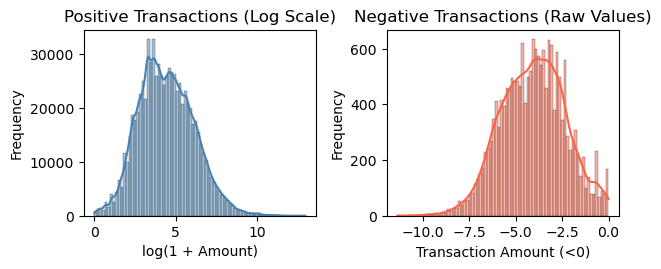

D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


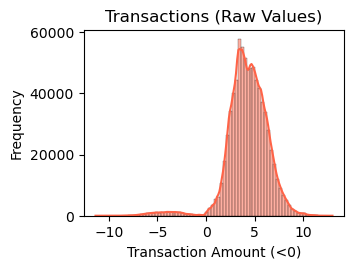

In [5]:


# Positive Transactions (Log Scale)
plt.subplot(2, 2, 1)
sns.histplot(np.log1p(df.loc[df['TrnxAmount'] >= 0, 'TrnxAmount']),
             bins=80, kde=True, color='steelblue')
plt.title("Positive Transactions (Log Scale)")
plt.xlabel("log(1 + Amount)")
plt.ylabel("Frequency")

# Negative Transactions (Raw Values)
plt.subplot(2, 2, 2)
sns.histplot(
    -np.log1p(-df.loc[df['TrnxAmount'] < 0, 'TrnxAmount']),  
    bins=80, kde=True, color='tomato'
)
plt.title("Negative Transactions (Raw Values)")
plt.xlabel("Transaction Amount (<0)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#Transactions (Raw Values)
plt.subplot(2, 2, 3)

sns.histplot(
    np.where(df['TrnxAmount'] < 0,
             -np.log1p(-df['TrnxAmount']),  
             np.log1p(df['TrnxAmount'])),    
    bins=80, kde=True, color='tomato'
)
plt.title("Transactions (Raw Values)")
plt.xlabel("Transaction Amount (<0)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



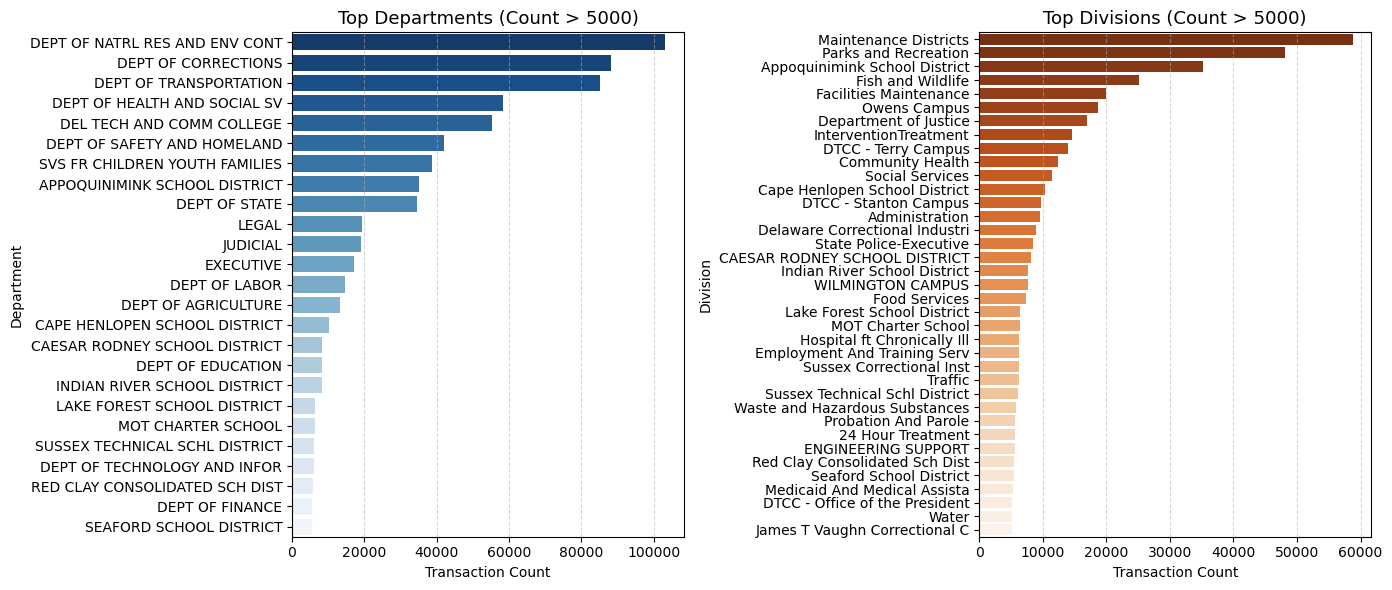

In [6]:
##Distribution of Departments/Divisions
threshold = 5000   

# Filtering
dept_counts = df['Department'].value_counts()
div_counts = df['Division'].value_counts()

dept_filtered = dept_counts[dept_counts > threshold].index
div_filtered = div_counts[div_counts > threshold].index

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(
    y='Department', data=df[df['Department'].isin(dept_filtered)],
    order=dept_counts[dept_filtered].index,
    ax=axes[0], palette='Blues_r'
)
axes[0].set_title("Top Departments (Count > {})".format(threshold), fontsize=13)
axes[0].set_xlabel("Transaction Count")
axes[0].set_ylabel("Department")

sns.countplot(
    y='Division', data=df[df['Division'].isin(div_filtered)],
    order=div_counts[div_filtered].index,
    ax=axes[1], palette='Oranges_r'
)
axes[1].set_title("Top Divisions (Count > {})".format(threshold), fontsize=13)
axes[1].set_xlabel("Transaction Count")
axes[1].set_ylabel("Division")


for ax in axes:
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_xlim(left=0)
    for label in ax.get_yticklabels():
        label.set_fontsize(10)

plt.tight_layout()
plt.show()


## Bivariate/Multivariate Analysis

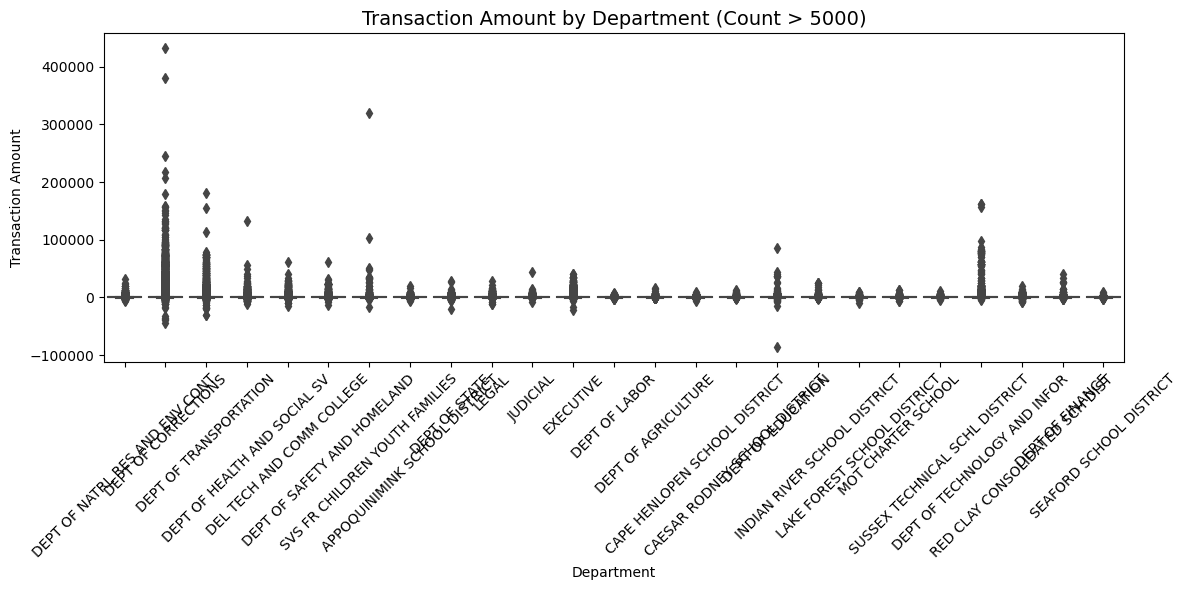

In [7]:
threshold = 5000   

# Amount 
dept_counts = df['Department'].value_counts()

# Filtering n>5000
dept_filtered = dept_counts[dept_counts > threshold].index

plt.figure(figsize=(12,6))
sns.boxplot(
    x='Department',
    y='TrnxAmount',
    data=df[df['Department'].isin(dept_filtered)],   
    order=dept_counts[dept_filtered].index           
)

plt.xticks(rotation=45, fontsize=10)
plt.title(f"Transaction Amount by Department (Count > {threshold})", fontsize=14)
plt.xlabel("Department")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()



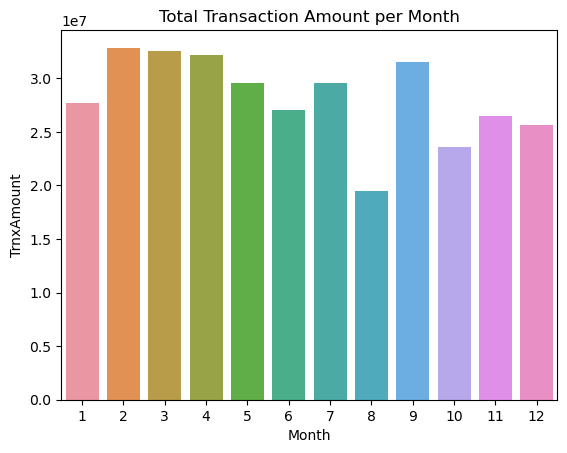

In [8]:
##Month vs Transaction Amount
monthly = df.groupby('Month')['TrnxAmount'].sum().reset_index()
sns.barplot(x='Month', y='TrnxAmount', data=monthly)
plt.title("Total Transaction Amount per Month")
plt.show()


# Feature Engineering

## Time-based Feature

In [9]:
df.drop(columns=['LogAmount'], inplace=True)

In [10]:
df['DayOfWeek'] = df['TranxDate'].dt.dayofweek
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','DayOfWeek']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,DayOfWeek
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,4
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,1
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,6
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,5
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,2
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,1
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,1
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,1
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,1


In [11]:
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','IsWeekend']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,IsWeekend
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,0
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,0
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,1
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,1
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,0
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,0
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,0
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,0
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,0


In [12]:
df['DayOfMonth'] = df['TranxDate'].dt.day
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','DayOfMonth']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,DayOfMonth
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,29
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,3
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,1
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,30
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,27
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,3
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,17
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,17
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,17


In [13]:
df['WeekOfMonth'] = df['TranxDate'].dt.day.map(lambda x: (x-1)//7 + 1)
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','WeekOfMonth']]


,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,WeekOfMonth
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,5
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,1
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,1
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,5
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,4
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,1
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,3
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,3
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,3


In [14]:
df['Quarter'] = df['TranxDate'].dt.quarter
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','Quarter']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,Quarter
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,2
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,3
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,3
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,2
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,2
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,1
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,1
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,1
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,1


In [15]:
df['IsMonthStart'] = df['TranxDate'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['TranxDate'].dt.is_month_end.astype(int)
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','IsMonthStart','IsMonthEnd']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,IsMonthStart,IsMonthEnd
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,0,0
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,0,0
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,1,0
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,0,1
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,0,0
...,...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,0,0
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,0,0
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,0,0
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,0,0


In [16]:
df['TimeGap'] = df.sort_values('TranxDate').groupby('Department')['TranxDate'].diff().dt.days
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','TimeGap']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,TimeGap
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,1.0
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,2.0
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,1.0
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,0.0
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,0.0
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,12.0
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,0.0
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,0.0
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,3.0


## Amount-based features

In [17]:
df['AmountZ'] = (df['TrnxAmount'] - df['TrnxAmount'].mean()) / df['TrnxAmount'].std()
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','AmountZ']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,AmountZ
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,-0.168662
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,-0.166588
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,-0.104038
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,1.207902
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,-0.127095
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,-0.113462
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,-0.120675
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,-0.168533
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,-0.155956


In [18]:
df['DeptAvg'] = df.groupby('Department')['TrnxAmount'].transform('mean')
df['DeptRelativeAmount'] = df['TrnxAmount'] / df['DeptAvg']
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','DeptAvg','DeptRelativeAmount']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,DeptAvg,DeptRelativeAmount
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,250.244715,0.039361
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,250.244715,0.059941
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,250.244715,0.680574
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,250.244715,13.697792
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,250.244715,0.451798
...,...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,428.259698,0.343040
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,428.259698,0.301219
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,428.259698,0.023747
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,428.259698,0.096670


In [19]:
df['MerchantAvg'] = df.groupby('Merchant')['TrnxAmount'].transform('mean')
df['MerchantRelativeAmount'] = df['TrnxAmount'] / df['MerchantAvg']
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','MerchantAvg','MerchantRelativeAmount']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,MerchantAvg,MerchantRelativeAmount
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,68.221823,0.144382
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,103.304627,0.145202
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,90.418916,1.883566
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,1945.072143,1.762300
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,924.254316,0.122326
...,...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,102.940000,1.427142
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,129.000000,1.000000
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,10.170000,1.000000
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,248.563097,0.166557


## Behavior-based

In [20]:
df['MerchantFreq'] = df.groupby('Merchant')['Merchant'].transform('count')
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','MerchantFreq']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,MerchantFreq
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,1086
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,897
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,452
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,14
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,709
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,10
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,1
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,1
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,113


In [21]:
df['DeptMerchantFreq'] = df.groupby(['Department', 'Merchant'])['Merchant'].transform('count')
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','DeptMerchantFreq']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,DeptMerchantFreq
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,14
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,29
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,63
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,2
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,265
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,1
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,1
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,1
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,24


In [22]:
df['DescFreq'] = df.groupby('TranxDescription')['TranxDescription'].transform('count')
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','DescFreq']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,DescFreq
0,2019,1,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85,6615
1,2019,1,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00,7151
2,2019,1,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31,4680
3,2019,1,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80,42129
4,2019,1,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06,1747
...,...,...,...,...,...,...,...,...
788516,2023,7,Freire Charter School,DUNKIN #353102 Q35,Fast Food Restaurants,2023-01-03,146.91,20875
788517,2023,7,Freire Charter School,B2B PRIME*486VU2453,Direct Marketing-Continuity-Subscription Merch...,2023-01-17,129.00,7151
788518,2023,7,Freire Charter School,AMZN MKTP US*UY9T053D3,Book Stores,2023-01-17,10.17,76704
788519,2023,7,Freire Charter School,USPS PO 0968270503,Postal Services-Government Only,2023-01-17,41.40,6615


## Pattern Features

In [23]:
df = df.sort_values(['Department', 'TranxDate'])
df['ShortIntervalFlag'] = (df['TimeGap'] <= 1).astype(int)
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','ShortIntervalFlag']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,ShortIntervalFlag
15233,2019,1,Academia Antonia Alonso,USPS PO 0968260505,Postal Services-Government Only,2018-07-02,42.21,0
15231,2019,1,Academia Antonia Alonso,USPS PO 0968250502,Postal Services-Government Only,2018-07-03,47.46,1
15237,2019,1,Academia Antonia Alonso,USPS PO 0968250502,Postal Services-Government Only,2018-07-03,113.00,1
15230,2019,1,Academia Antonia Alonso,BOXWOOD TECHNOLOGY INC,Computer Software Stores,2018-07-10,287.50,1
15235,2019,1,Academia Antonia Alonso,AATSP,Organizations Membership-Not Elsewhere Classified,2018-07-10,45.00,0
...,...,...,...,...,...,...,...,...
787110,2023,7,Woodbridge School District,OFFICEMAX/DEPOT 6216,Direct Marketing-Combination Catalog-Retail Merch,2023-01-25,13.34,1
787111,2023,7,Woodbridge School District,OFFICE DEPOT #5910,Direct Marketing-Combination Catalog-Retail Merch,2023-01-25,179.99,1
787121,2023,7,Woodbridge School District,INTERNATIONAL TRANSACTION,Internal Transaction,2023-01-25,4.09,1
787122,2023,7,Woodbridge School District,COSPACES,Comp Programing Data Prcsng Intgrtd Sys Dsgn Srvs,2023-01-25,272.50,1


In [24]:
df['AmountDiff'] = df.groupby('Department')['TrnxAmount'].diff()
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','AmountDiff']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,AmountDiff
15233,2019,1,Academia Antonia Alonso,USPS PO 0968260505,Postal Services-Government Only,2018-07-02,42.21,NaN
15231,2019,1,Academia Antonia Alonso,USPS PO 0968250502,Postal Services-Government Only,2018-07-03,47.46,5.25
15237,2019,1,Academia Antonia Alonso,USPS PO 0968250502,Postal Services-Government Only,2018-07-03,113.00,65.54
15230,2019,1,Academia Antonia Alonso,BOXWOOD TECHNOLOGY INC,Computer Software Stores,2018-07-10,287.50,174.50
15235,2019,1,Academia Antonia Alonso,AATSP,Organizations Membership-Not Elsewhere Classified,2018-07-10,45.00,-242.50
...,...,...,...,...,...,...,...,...
787110,2023,7,Woodbridge School District,OFFICEMAX/DEPOT 6216,Direct Marketing-Combination Catalog-Retail Merch,2023-01-25,13.34,-324.17
787111,2023,7,Woodbridge School District,OFFICE DEPOT #5910,Direct Marketing-Combination Catalog-Retail Merch,2023-01-25,179.99,166.65
787121,2023,7,Woodbridge School District,INTERNATIONAL TRANSACTION,Internal Transaction,2023-01-25,4.09,-175.90
787122,2023,7,Woodbridge School District,COSPACES,Comp Programing Data Prcsng Intgrtd Sys Dsgn Srvs,2023-01-25,272.50,268.41


In [25]:
df['SameDayTotalAmount'] = df.groupby(['Department','TranxDate'])['TrnxAmount'].transform('sum')
df[['Year','Month','Division','Merchant','TranxDescription','TranxDate','TrnxAmount','SameDayTotalAmount']]

,Year,Month,Division,Merchant,TranxDescription,TranxDate,TrnxAmount,SameDayTotalAmount
15233,2019,1,Academia Antonia Alonso,USPS PO 0968260505,Postal Services-Government Only,2018-07-02,42.21,42.21
15231,2019,1,Academia Antonia Alonso,USPS PO 0968250502,Postal Services-Government Only,2018-07-03,47.46,160.46
15237,2019,1,Academia Antonia Alonso,USPS PO 0968250502,Postal Services-Government Only,2018-07-03,113.00,160.46
15230,2019,1,Academia Antonia Alonso,BOXWOOD TECHNOLOGY INC,Computer Software Stores,2018-07-10,287.50,332.50
15235,2019,1,Academia Antonia Alonso,AATSP,Organizations Membership-Not Elsewhere Classified,2018-07-10,45.00,332.50
...,...,...,...,...,...,...,...,...
787110,2023,7,Woodbridge School District,OFFICEMAX/DEPOT 6216,Direct Marketing-Combination Catalog-Retail Merch,2023-01-25,13.34,1988.98
787111,2023,7,Woodbridge School District,OFFICE DEPOT #5910,Direct Marketing-Combination Catalog-Retail Merch,2023-01-25,179.99,1988.98
787121,2023,7,Woodbridge School District,INTERNATIONAL TRANSACTION,Internal Transaction,2023-01-25,4.09,1988.98
787122,2023,7,Woodbridge School District,COSPACES,Comp Programing Data Prcsng Intgrtd Sys Dsgn Srvs,2023-01-25,272.50,1988.98
